<font color='green'><center><h1> Human Activity Recognition with Smartphones Using Machine Learning Algorithms </h1></center>

<font color='purple'><center><h1> Table of Contents </h1></center>

### Table of Contents

* [Main Approach](#chapter1)
    * [Import Libraries/Dataset](#section_1_1)
    * [Data Visualization and Exploration](section_1_2)
        * [Describe the Dataset](#section_1_2_1)
        * [Data Visualization](#section_1_2_2)
    * [Data Pre-processing and Cleaning](#section_1_3)
        * [Data Cleaning](#section_1_3_1)
        * [Feature Elimination](#section_1_3_2)
        * [Target Feature Label Encoding](#section_1_3_3)
        * [Correlation Analysis](#section_1_3_4)
        * [Split Dataset into Train/Test Sets](#section_1_3_5)
        * [Visualize and Check for Class Balancing](#section_1_3_6)
    * [Model Building - Logistic Regression](#section_1_4)
        * [Model Building - Case A](#section_1_4_1)
        * [Model Building - Case B](#section_1_4_2)
    * [Model Evaluation](#section_1_5)
        * [Model Evaluation - Case A - Test Data](#section_1_5_1)
        * [Model Evaluation - Case A - Train Data](#section_1_5_2)
        * [Model Evaluation - Case B - Test Data](#section_1_5_3)
        * [Model Evaluation - Case B - Train Data](#section_1_5_4)
* [Alternate Approach](#chapter2)
    * [Normalization](#section_2_1)
    * [Principal Component Analysis](#section_2_2)
    * [PCA for Plotting](#section_2_3)
    * [Model Building with PCA - Case A](#section_2_4)
    * [Model Evaluation with PCA - Case A - Test Data](#section_2_5)
    * [Model Evaluation with PCA - Case A - Train Data](#section_2_6)
    * [Model Building with PCA - Case B](#section_2_7)
    * [Model Evaluation with PCA - Case B - Test Data](#section_2_8)
    * [Model Evaluation with PCA - Case B - Train Data](#section_2_9)

<a class="anchor" id="chapter1"></a>

<font color='purple'><center><h1> Main Approach </h1></center>

<a class="anchor" id="section_1_1"></a>

<font color='purple'><center><h1> Import Libraries/Dataset </h1></center>

In [ ]:
import pandas as pd
import numpy as np

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

import statsmodels.api as sm

import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Import all machine learning algorithms
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Import other useful subpackage
from sklearn.metrics import accuracy_score

# and we want to view the charts inline
%matplotlib inline

In [3]:
df_init = pd.read_csv("Human_activity_Dataset.csv")

<a class="anchor" id="section_1_2"></a>

<font color='purple'><center><h1> Data Visualization and Exploration </h1></center>

<a class="anchor" id="section_1_2_1"></a>

<font color='blue'><center><h2> Describe the Dataset </h2></center>

In [4]:
df_init.head(2)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-kurtosis()  \
0         -0.923527         -0.934724  ...                        -0.710304   
1         -0.957686         -0.943068  ...                        -0.861499   

   angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
0                    -0.112754                              0.030400   
1                     0.053477                             -0.007435   

   angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
0                         -0.464761                             -0.018446   
1                         -0.732626                              0.703511   

   angle(X,gravityMean)  angle(Y,gravityMean)  angle(Z,gravityMean)  \
0             -0.841247              0.179941             -0.058627   
1             -0.844788              0.180289             -0.054317   

   subject/Participant  Activity  
0                    1  STANDING  
1                    1  STANDING  

[2 rows x 563 columns]

In [5]:
# Display info regarding the Dataset
df_init.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 44.2+ MB


In [6]:
# Describe the dataset
df_init.describe()

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
count       10299.000000       10299.000000       10299.000000   
mean            0.274347          -0.017743          -0.108925   
std             0.067628           0.037128           0.053033   
min            -1.000000          -1.000000          -1.000000   
25%             0.262625          -0.024902          -0.121019   
50%             0.277174          -0.017162          -0.108596   
75%             0.288354          -0.010625          -0.097589   
max             1.000000           1.000000           1.000000   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
count      10299.000000      10299.000000      10299.000000      10299.000000   
mean          -0.607784         -0.510191         -0.613064         -0.633593   
std            0.438694          0.500240          0.403657          0.413333   
min           -1.000000         -1.000000         -1.000000         -1.000000   
25%           -0.992360         -0.976990         -0.979137         -0.993293   
50%           -0.943030         -0.835032         -0.850773         -0.948244   
75%           -0.250293         -0.057336         -0.278737         -0.302033   
max            1.000000          1.000000          1.000000          1.000000   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
count      10299.000000      10299.000000      10299.000000  ...   
mean          -0.525697         -0.614989         -0.466732  ...   
std            0.484201          0.399034          0.538707  ...   
min           -1.000000         -1.000000         -1.000000  ...   
25%           -0.977017         -0.979064         -0.935788  ...   
50%           -0.843670         -0.845068         -0.874825  ...   
75%           -0.087405         -0.288149         -0.014641  ...   
max            1.000000          1.000000          1.000000  ...   

       fBodyBodyGyroJerkMag-skewness()  fBodyBodyGyroJerkMag-kurtosis()  \
count                     10299.000000                     10299.000000   
mean                         -0.298592                        -0.617700   
std                           0.320199                         0.308796   
min                          -1.000000                        -1.000000   
25%                          -0.536174                        -0.841847   
50%                          -0.335160                        -0.703402   
75%                          -0.113167                        -0.487981   
max                           1.000000                         1.000000   

       angle(tBodyAccMean,gravity)  angle(tBodyAccJerkMean),gravityMean)  \
count                 10299.000000                          10299.000000   
mean                      0.007705                              0.002648   
std                       0.336591                              0.447364   
min                      -1.000000                             -1.000000   
25%                      -0.124694                             -0.287031   
50%                       0.008146                              0.007668   
75%                       0.149005                              0.291490   
max                       1.000000                              1.000000   

       angle(tBodyGyroMean,gravityMean)  angle(tBodyGyroJerkMean,gravityMean)  \
count                      10299.000000                          10299.000000   
mean                           0.017683                             -0.009219   
std                            0.616188                              0.484770   
min                           -1.000000                             -1.000000   
25%                           -0.493108                             -0.389041   
50%                            0.017192                             -0.007186   
75%                            0.536137                              0.365996   
max                            1.000000                     

<a class="anchor" id="section_1_2_2"></a>

<font color='blue'><center><h2> Data Visualization </h2></center>

In [7]:
# Look at the distribution of the target variable - Activity
act_count = df_init['Activity'].value_counts().rename_axis('Activity Name').to_frame('Count')
act_count.reset_index(level=0, inplace=True)
act_count

Activity Name  Count
0              LAYING   1944
1            STANDING   1906
2             SITTING   1777
3             WALKING   1722
4    WALKING_UPSTAIRS   1544
5  WALKING_DOWNSTAIRS   1406

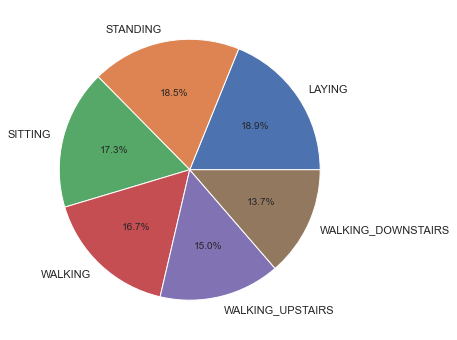

In [8]:
# Instantiate a figure and an axes
fig_pie, ax_pie = plt.subplots(figsize=(6,6))

# Plot the pie chart
w, l, v = ax_pie.pie(x='Count', labels='Activity Name', data=act_count, autopct='%1.1f%%')

In [9]:
df_grp = df_init.groupby(['subject/Participant','Activity'])['tBodyAcc-mean()-X'].count()
df_grp = df_grp.reset_index()
df_grp.columns = ['subject/Participant','Activity','Count']
df_grp.head(2)

subject/Participant Activity  Count
0                    1   LAYING     50
1                    1  SITTING     47

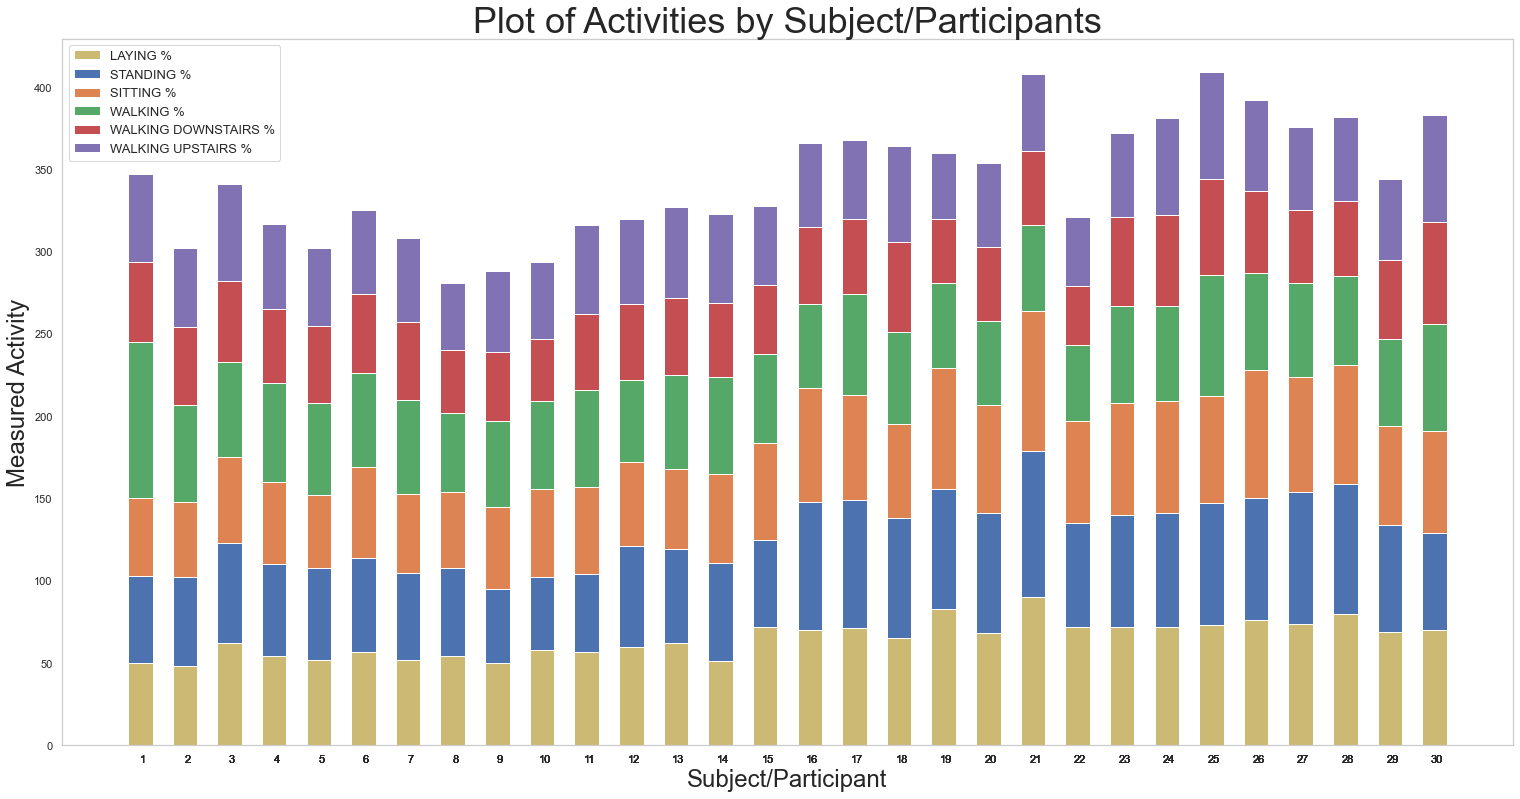

In [10]:
fig_stack, ax_stack = plt.subplots(figsize=(26,13))

width=0.55

# selecting rows based on condition
df_grp_lay = df_grp[df_grp['Activity'] == 'LAYING']
df_grp_stand = df_grp[df_grp['Activity'] == 'STANDING']
df_grp_sit = df_grp[df_grp['Activity'] == 'SITTING']
df_grp_walk = df_grp[df_grp['Activity'] == 'WALKING']
df_grp_dwalk = df_grp[df_grp['Activity'] == 'WALKING_DOWNSTAIRS']
df_grp_uwalk = df_grp[df_grp['Activity'] == 'WALKING_UPSTAIRS']

y1 = df_grp_lay['Count'].to_numpy()
y2 = df_grp_stand['Count'].to_numpy()
y3 = df_grp_sit['Count'].to_numpy()
y4 = df_grp_walk['Count'].to_numpy()
y5 = df_grp_dwalk['Count'].to_numpy()
y6 = df_grp_uwalk['Count'].to_numpy()

lay_bar = ax_stack.bar(df_grp_lay['subject/Participant'], y1, label='LAYING %', width=width, color='y')
stand_bar = ax_stack.bar(df_grp_stand['subject/Participant'], y2, bottom = y1, label='STANDING %', width=width)
sit_bar = ax_stack.bar(df_grp_sit['subject/Participant'], y3, bottom = y1+y2, label='SITTING %', width=width)
walk_bar = ax_stack.bar(df_grp_walk['subject/Participant'], y4, bottom = y1+y2+y3, label='WALKING %', width=width)
dwalk_bar = ax_stack.bar(df_grp_dwalk['subject/Participant'], y5, bottom = y1+y2+y3+y4, label='WALKING DOWNSTAIRS %', width=width)
uwalk_bar = ax_stack.bar(df_grp_uwalk['subject/Participant'], y6, bottom = y1+y2+y3+y4+y5, label='WALKING UPSTAIRS %', width=width)

ax_stack.set_xticks(df_grp['subject/Participant'] +width/10)
ax_stack.set_xticklabels(df_grp['subject/Participant'])
ax_stack.grid(False)
plt.xlabel("Subject/Participant", fontsize=24)
plt.ylabel("Measured Activity", fontsize=24)
plt.title("Plot of Activities by Subject/Participants", fontsize=36)

# Let's show the legend
ax_stack.legend(prop={"size":13})

<font color='blue'> <b><u> Inferences </b></u> <br>
<ul style="list-style-type:disc"> 
<li> The various target classes are well-balanced. Thus, no balancing of target data has to be done. </li>
<li> The 30 subjects have nearly uniform activity ratios. </li>
<li> Subject 21 seems to have the most data with laying and walking activities contributing to the increase. </li>
<li> From an activity standpoint, subject 25 seems to have been most active with the more strenuous activities taking up more data points. </li> </ul>

<a class="anchor" id="section_1_3"></a>

<font color='purple'><center><h1> Data Pre-processing and Cleaning </h1></center>

<a class="anchor" id="section_1_3_1"></a>

<font color='blue'><center><h2> Data Cleaning </h2></center>

In [11]:
# Check number of null entries per column
# df_init.isnull().sum()!=0
df_init.columns[df_init.isnull().any()].tolist()

[]

In [12]:
# Check number of missing values per column
df_init.columns[df_init.isna().any()].tolist()

[]

<b><u>Inference:</b></u> There are no null or missing values. Thus, no treatment is needed.

<a class="anchor" id="section_1_3_2"></a>

<font color='blue'><center><h2> Feature Elimination </h2></center>

<b><u>Objective:</b></u> The aim is to predict the activity given the features in the dataset. 
Since, this will be independent of participants, let's remove the participant information first.

In [15]:
df_logreg_pre = df_init.copy(deep=True)
df_logreg_pre = df_logreg_pre.drop(['subject/Participant'], axis=1)
df_logreg_pre.head(2)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  tBodyAcc-std()-X  \
0           0.288585          -0.020294          -0.132905         -0.995279   
1           0.278419          -0.016411          -0.123520         -0.998245   

   tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  tBodyAcc-mad()-Y  \
0         -0.983111         -0.913526         -0.995112         -0.983185   
1         -0.975300         -0.960322         -0.998807         -0.974914   

   tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  fBodyBodyGyroJerkMag-skewness()  \
0         -0.923527         -0.934724  ...                        -0.298676   
1         -0.957686         -0.943068  ...                        -0.595051   

   fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                        -0.710304                    -0.112754   
1                        -0.861499                     0.053477   

   angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                              0.030400                         -0.464761   
1                             -0.007435                         -0.732626   

   angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
0                             -0.018446             -0.841247   
1                              0.703511             -0.844788   

   angle(Y,gravityMean)  angle(Z,gravityMean)  Activity  
0              0.179941             -0.058627  STANDING  
1              0.180289             -0.054317  STANDING  

[2 rows x 562 columns]

<a class="anchor" id="section_1_3_3"></a>

<font color='blue'><center><h2> Target Feature Label Encoding </h2></center>

<b><u>Objective:</b></u> Let's create a column to have an encoded version of the activity. 
    This is useful if we use statsmodel package or try to plot the AUC/ROC Curve.

In [16]:
# LAYING (0), SITTING (1), STANDING (2), WALKING_DOWNSTAIRS (3), WALKING (4), WALKING_UPSTAIRS (5)

df_logreg_encd = df_logreg_pre.copy(deep=True)

# Assign values to the pre-set hierarchy of cloudiness
df_logreg_encd.loc[df_logreg_encd['Activity'] == 'LAYING', 'Activity_Code'] = 0
df_logreg_encd.loc[df_logreg_encd['Activity'] == 'SITTING', 'Activity_Code'] = 1
df_logreg_encd.loc[df_logreg_encd['Activity'] == 'STANDING', 'Activity_Code'] = 2
df_logreg_encd.loc[df_logreg_encd['Activity'] == 'WALKING_DOWNSTAIRS', 'Activity_Code'] = 3
df_logreg_encd.loc[df_logreg_encd['Activity'] == 'WALKING', 'Activity_Code'] = 4
df_logreg_encd.loc[df_logreg_encd['Activity'] == 'WALKING_UPSTAIRS', 'Activity_Code'] = 5

df_logreg_encd['Activity_Code'] = df_logreg_encd['Activity_Code'].astype(int)
#y_train_encd_A = y_train_encd_A.astype(str).astype(float)

<a class="anchor" id="section_1_3_4"></a>

<font color='blue'><center><h2> Correlation Analysis </h2></center>

<b><u>Objective:</b></u> It is very cumbersome to visualize the correlation matrix when there are 500+ independent variables. Thus, we can use filtering methods to find the correlations between independent variables.

In [17]:
# Pearson correlation coefficient
corr = df_logreg_encd.corr()['Activity_Code'].sort_values(ascending=False)[1:]

# absolute for positive values
abs_corr = abs(corr)

# random threshold for features to keep
relevant_features = abs_corr[abs_corr>0.4]
relevant_features

tBodyGyroJerk-entropy()-Z    0.855767
tBodyAccJerk-entropy()-Y     0.854650
tBodyAccJerk-entropy()-X     0.852440
tBodyAccJerk-entropy()-Z     0.841360
tBodyAccJerkMag-entropy()    0.840970
                               ...   
tBodyAccJerk-min()-Y         0.734316
tBodyGyro-min()-Z            0.754329
tBodyAcc-min()-Y             0.757575
tBodyAcc-min()-X             0.760680
tBodyAccJerk-min()-X         0.773804
Name: Activity_Code, Length: 372, dtype: float64

In [18]:
# Find Correlation matrix
corr_matrix = df_logreg_encd.corr().abs()

sort_temp = corr_matrix.unstack()
corr_sorted = sort_temp.sort_values(kind="quicksort")

print(corr_sorted[corr_sorted>0.7])
#print(corr_sorted[-10309:-10299])

fBodyGyro-bandsEnergy()-1,24  tBodyAccJerkMag-entropy()       0.700004
tBodyAccJerkMag-entropy()     fBodyGyro-bandsEnergy()-1,24    0.700004
fBodyAcc-bandsEnergy()-33,48  tBodyGyroJerkMag-max()          0.700005
tBodyGyroJerkMag-max()        fBodyAcc-bandsEnergy()-33,48    0.700005
tBodyAccJerk-std()-X          fBodyGyro-bandsEnergy()-1,8     0.700006
                                                                ...   
fBodyAccJerk-energy()-Z       fBodyAccJerk-energy()-Z         1.000000
fBodyAccJerk-energy()-Y       fBodyAccJerk-energy()-Y         1.000000
fBodyAccJerk-energy()-X       fBodyAccJerk-energy()-X         1.000000
fBodyAccJerk-entropy()-Y      fBodyAccJerk-entropy()-Y        1.000000
Activity_Code                 Activity_Code                   1.000000
Length: 73386, dtype: float64


<b><u>Inference:</b></u> <br><br> A lot of the dependent variables are highly correlated with the target variable. 
At the same time, many of the dependent variables are highly correlated with each other. 
Using them as such will lead to redundancy in features. Thus, it is advisable to perform Principal Component Selection on the dataset features.<br><br>
However, the main solution does not use PCA. The Alternate Approach has been demonstrated with the use of normalization and PCA.

<a class="anchor" id="section_1_3_5"></a>

<font color='blue'><center><h2> Split Dataset into Train/Test Sets </h2></center>

In [19]:
# Display the current dataset
df_logreg_encd

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0               0.288585          -0.020294          -0.132905   
1               0.278419          -0.016411          -0.123520   
2               0.279653          -0.019467          -0.113462   
3               0.279174          -0.026201          -0.123283   
4               0.276629          -0.016570          -0.115362   
...                  ...                ...                ...   
10294           0.310155          -0.053391          -0.099109   
10295           0.363385          -0.039214          -0.105915   
10296           0.349966           0.030077          -0.115788   
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0             -0.995279         -0.983111         -0.913526         -0.995112   
1             -0.998245         -0.975300         -0.960322         -0.998807   
2             -0.995380         -0.967187         -0.978944         -0.996520   
3             -0.996091         -0.983403         -0.990675         -0.997099   
4             -0.998139         -0.980817         -0.990482         -0.998321   
...                 ...               ...               ...               ...   
10294         -0.287866         -0.140589         -0.215088         -0.356083   
10295         -0.305388          0.028148         -0.196373         -0.373540   
10296         -0.329638         -0.042143         -0.250181         -0.388017   
10297         -0.323114         -0.229775         -0.207574         -0.392380   
10298         -0.330046         -0.195253         -0.164339         -0.430974   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
0             -0.983185         -0.923527         -0.934724  ...   
1             -0.974914         -0.957686         -0.943068  ...   
2             -0.963668         -0.977469         -0.938692  ...   
3             -0.982750         -0.989302         -0.938692  ...   
4             -0.979672         -0.990441         -0.942469  ...   
...                 ...               ...               ...  ...   
10294         -0.148775         -0.232057          0.185361  ...   
10295         -0.030036         -0.270237          0.185361  ...   
10296         -0.133257         -0.347029          0.007471  ...   
10297         -0.279610         -0.289477          0.007471  ...   
10298         -0.218295         -0.229933         -0.111527  ...   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
0                            -0.710304                    -0.112754   
1                            -0.861499                     0.053477   
2                            -0.760104                    -0.118559   
3                            -0.482845                    -0.036788   
4                            -0.699205                     0.123320   
...                                ...                          ...   
10294                        -0.750809                    -0.337422   
10295                        -0.700274                    -0.736701   
10296                        -0.467179                    -0.181560   
10297                        -0.617737                     0.444558   
10298                        -0.436940                     0.598808   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
0                                  0.030400                         -0.464761   
1                                 -0.007435                         -0.732626   
2                                  0.177899                          0.100699   
3                                 -0.012892                          0.640011   
4                                  0.122542                          0.693578   
...                                     ...                               ...   
1029

In [20]:
df_logreg = df_logreg_encd.copy(deep=True)
df_logreg.tail(2)

tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
10297           0.237594           0.018467          -0.096499   
10298           0.153627          -0.018437          -0.137018   

       tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
10297         -0.323114         -0.229775         -0.207574         -0.392380   
10298         -0.330046         -0.195253         -0.164339         -0.430974   

       tBodyAcc-mad()-Y  tBodyAcc-mad()-Z  tBodyAcc-max()-X  ...  \
10297         -0.279610         -0.289477          0.007471  ...   
10298         -0.218295         -0.229933         -0.111527  ...   

       fBodyBodyGyroJerkMag-kurtosis()  angle(tBodyAccMean,gravity)  \
10297                        -0.617737                     0.444558   
10298                        -0.436940                     0.598808   

       angle(tBodyAccJerkMean),gravityMean)  angle(tBodyGyroMean,gravityMean)  \
10297                             -0.819188                          0.929294   
10298                             -0.287951                          0.876030   

       angle(tBodyGyroJerkMean,gravityMean)  angle(X,gravityMean)  \
10297                             -0.008398             -0.659719   
10298                             -0.024965             -0.660080   

       angle(Y,gravityMean)  angle(Z,gravityMean)          Activity  \
10297              0.264782              0.187563  WALKING_UPSTAIRS   
10298              0.263936              0.188103  WALKING_UPSTAIRS   

       Activity_Code  
10297              5  
10298              5  

[2 rows x 563 columns]

In [21]:
# Set parameters to be used in train_test_split
test_case_A = 0.2
test_case_B = 0.9
rand_var_A = 1
rand_var_B = 10

# Defining X and Y
X_logreg = df_logreg.drop(['Activity', 'Activity_Code'], axis=1)
y_logreg = df_logreg[['Activity', 'Activity_Code']]

# Split the dataset to train and test for Case A
X_train_init_A, X_test_init_A, y_train_init_A, y_test_init_A = train_test_split(X_logreg, y_logreg, test_size=test_case_A, random_state=rand_var_A)

# Split the dataset to train and test for Case B
X_train_init_B, X_test_init_B, y_train_init_B, y_test_init_B = train_test_split(X_logreg, y_logreg, test_size=test_case_B, random_state=rand_var_B)

<b><u>Objective</b></u> Now, let's split the y dataframe into its encoded version and character label version.
This is done for certain specific purposes downstream

In [22]:
# Separate the y dataframe for training dataset of Case A into text target and label encoded target
y_train_init_encd_A = y_train_init_A.copy(deep=True)
y_train_init_encd_A = y_train_init_encd_A.drop(['Activity'], axis=1)
y_test_init_encd_A = y_test_init_A.copy(deep=True)
y_test_init_encd_A = y_test_init_encd_A.drop(['Activity'], axis=1)

# Separate the y dataframe for training dataset of Case A into text target and character target
y_train_init_txt_A = y_train_init_A.copy(deep=True)
y_train_init_txt_A = y_train_init_txt_A.drop(['Activity_Code'], axis=1)
y_test_init_txt_A = y_test_init_A.copy(deep=True)
y_test_init_txt_A = y_test_init_txt_A.drop(['Activity_Code'], axis=1)

# Separate the y dataframe for training dataset of Case B into text target and label encoded target
y_train_init_encd_B = y_train_init_B.copy(deep=True)
y_train_init_encd_B = y_train_init_encd_B.drop(['Activity'], axis=1)
y_test_init_encd_B = y_test_init_B.copy(deep=True)
y_test_init_encd_B = y_test_init_encd_B.drop(['Activity'], axis=1)

# Separate the y dataframe for training dataset of Case B into text target and character target
y_train_init_txt_B = y_train_init_B.copy(deep=True)
y_train_init_txt_B = y_train_init_txt_B.drop(['Activity_Code'], axis=1)
y_test_init_txt_B = y_test_init_B.copy(deep=True)
y_test_init_txt_B = y_test_init_txt_B.drop(['Activity_Code'], axis=1)

<a class="anchor" id="section_1_3_6"></a>

<font color='blue'><center><h2> Visualize and Check for Class Balancing </h2></center>

<b><u>Objective</b></u> Before we build the model, let's ensure that after splitting, 
the target data is still balanced across the various discrete target classes. 

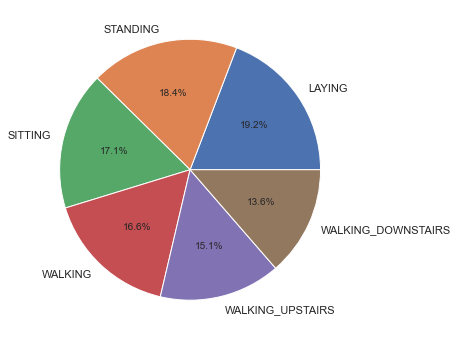

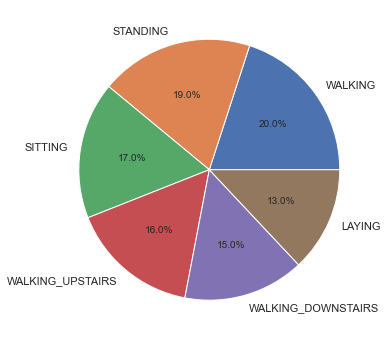

In [23]:
# Set up the dataset
X_train_plot_A = X_train_init_A.copy(deep=True)
X_train_plot_A['Activity'] = y_train_init_txt_A
X_train_plot_B = X_train_init_B.copy(deep=True)
X_train_plot_B['Activity'] = y_test_init_txt_A

# Look at the distribution of the target variable - Activity
act_train_A = X_train_plot_A['Activity'].value_counts().rename_axis('Activity Name').to_frame('Count')
act_train_A.reset_index(level=0, inplace=True)
act_train_B = X_train_plot_B['Activity'].value_counts().rename_axis('Activity Name').to_frame('Count')
act_train_B.reset_index(level=0, inplace=True)

# Instantiate a figure and an axes
fig_pie_A, ax_pie_A = plt.subplots(figsize=(6,6))
fig_pie_B, ax_pie_B = plt.subplots(figsize=(6,6))

# Plot the pie chart
w_A, l_A, v_A = ax_pie_A.pie(x='Count', labels='Activity Name', data=act_train_A, autopct='%1.1f%%')
w_B, l_B, v_B = ax_pie_B.pie(x='Count', labels='Activity Name', data=act_train_B, autopct='%1.1f%%')

<a class="anchor" id="section_1_4"></a>

<font color='purple'><center><h1> Model Building - Logistic Regression </h1></center>

<b><u>Objective</b></u> This problem has multiple classes in the target space. 
Thus, we will use the method of Multinomial Logistic Regression for best results. 

<a class="anchor" id="section_1_4_1"></a>

<font color='blue'><center><h2> Model Building - Case A </h2></center>

In [24]:
# Logistic Regression for Test Set Case A
clf_A = LogisticRegression(multi_class='multinomial', max_iter=500, penalty='l2', C=0.01).fit(X_train_init_A, y_train_init_txt_A.values.ravel())
y_pred_test_A = clf_A.predict(X_test_init_A)
accuracy_score_A = accuracy_score(y_test_init_txt_A, y_pred_test_A)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score_A))

Logistic Regression accuracy: 95.48543689320388%


<a class="anchor" id="section_1_4_2"></a>

<font color='blue'><center><h2> Model Building - Case B </h2></center>

In [25]:
# Logistic Regression for Test Set Case B
clf_B = LogisticRegression(multi_class='multinomial', max_iter=500, penalty='l2', C=0.01).fit(X_train_init_B, y_train_init_txt_B.values.ravel())
y_pred_test_B = clf_B.predict(X_test_init_B)
accuracy_score_B = accuracy_score(y_test_init_txt_B, y_pred_test_B)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score_B))

Logistic Regression accuracy: 91.00323624595468%


<b><u>Objective:</b></u> The accuracy metric seems to agree with our current model.

<a class="anchor" id="section_1_5"></a>

<font color='purple'><center><h1> Model Evaluation </h1></center>

<a class="anchor" id="section_1_5_1"></a>

<font color='blue'><center><h2> Model Evaluation - Case A - Test Data </h2></center>

In [26]:
cnf_matrix_logreg_A = metrics.confusion_matrix(y_test_init_txt_A, y_pred_test_A)
print(cnf_matrix_logreg_A)

[[362   0   0   0   0   0]
 [  5 317  44   0   0   0]
 [  0  18 371   0   0   0]
 [  0   0   0 352   1   2]
 [  0   0   0   1 270  13]
 [  0   0   0   2   7 295]]


Text(0.5, 320.8, 'Predicted label')

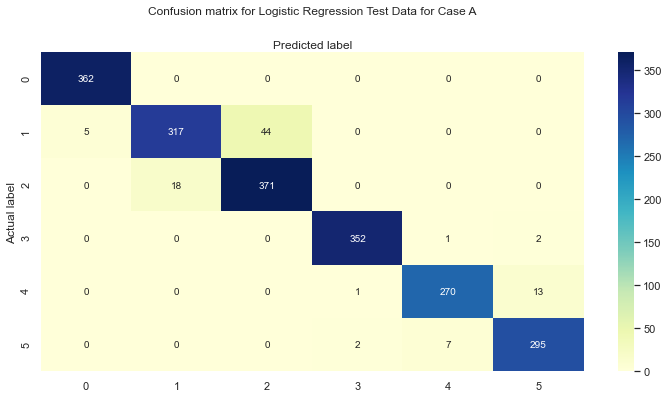

In [27]:
# Visualize Heatmap of Confusion Matrix for test data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_A), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Test Data for Case A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [28]:
# Look at the Classification report of test data
print(classification_report(y_test_init_txt_A, y_pred_test_A))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      0.99       362
           SITTING       0.95      0.87      0.90       366
          STANDING       0.89      0.95      0.92       389
           WALKING       0.99      0.99      0.99       355
WALKING_DOWNSTAIRS       0.97      0.95      0.96       284
  WALKING_UPSTAIRS       0.95      0.97      0.96       304

          accuracy                           0.95      2060
         macro avg       0.96      0.96      0.96      2060
      weighted avg       0.96      0.95      0.95      2060



<b><u>Objective</b></u> The Performance metrics of the test data for Case-A:
<ul style="list-style-type:disc"> 
<li> Accuracy = 95% </li>
<li> Precision = 96% </li>
<li> Recall = 96% </li>
<li> F1-Score = 95% </li> </ul>

<a class="anchor" id="section_1_5_2"></a>

<font color='blue'><center><h2> Model Evaluation - Case A - Train Data </h2></center>

In [29]:
clf_train_A = LogisticRegression(multi_class='multinomial', max_iter=500, penalty='l2', C=0.01).fit(X_train_init_A, y_train_init_txt_A.values.ravel())
y_pred_train_logreg_A = clf_train_A.predict(X_train_init_A)

In [30]:
cnf_matrix_logreg_train_A = metrics.confusion_matrix(y_train_init_txt_A, y_pred_train_logreg_A)
print(cnf_matrix_logreg_train_A)

[[1580    0    0    0    2    0]
 [   5 1276  126    0    0    4]
 [   0  108 1407    0    0    2]
 [   0    0    0 1348    8   11]
 [   0    0    0    7 1087   28]
 [   0    0    0    6   15 1219]]


Text(0.5, 320.8, 'Predicted label')

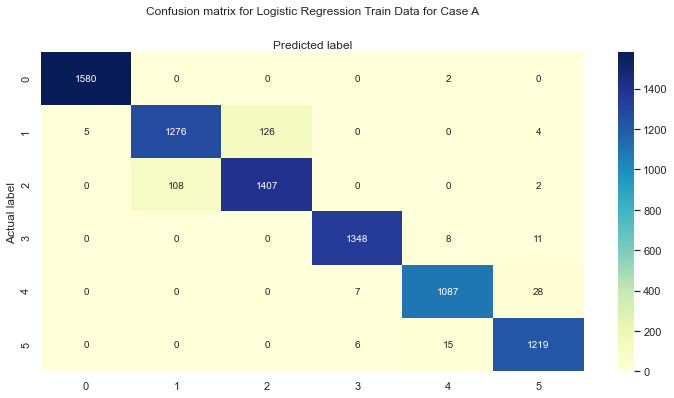

In [31]:
# Visualize Heatmap of Confusion Matrix for train data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_train_A), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Train Data for Case A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [32]:
# Look at the Classification report of train data
print(classification_report(y_train_init_txt_A, y_pred_train_logreg_A))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1582
           SITTING       0.92      0.90      0.91      1411
          STANDING       0.92      0.93      0.92      1517
           WALKING       0.99      0.99      0.99      1367
WALKING_DOWNSTAIRS       0.98      0.97      0.97      1122
  WALKING_UPSTAIRS       0.96      0.98      0.97      1240

          accuracy                           0.96      8239
         macro avg       0.96      0.96      0.96      8239
      weighted avg       0.96      0.96      0.96      8239



<b><u>Objective</b></u> The Performance metrics of the train data for Case-A:
<ul style="list-style-type:disc"> 
<li> Accuracy = 96% </li>
<li> Precision = 96% </li>
<li> Recall = 96% </li>
<li> F1-Score = 96% </li> </ul>

<b><u>Inference</b></u> The model performs well with train data and test data. If we differentiate the metrics across the target classes, Sitting has the lowest performance.

<a class="anchor" id="section_1_5_3"></a>

<font color='blue'><center><h2> Model Evaluation - Case B - Test Data </h2></center>

In [33]:
cnf_matrix_logreg_B = metrics.confusion_matrix(y_test_init_txt_B, y_pred_test_B)
print(cnf_matrix_logreg_B)

[[1755    0    0    0    1    3]
 [  30 1246  325    0    0    6]
 [   0  186 1530    0    0    2]
 [   0    0    0 1459   12   56]
 [   0    0    0   44 1144   73]
 [   0    0    0   49   47 1302]]


Text(0.5, 320.8, 'Predicted label')

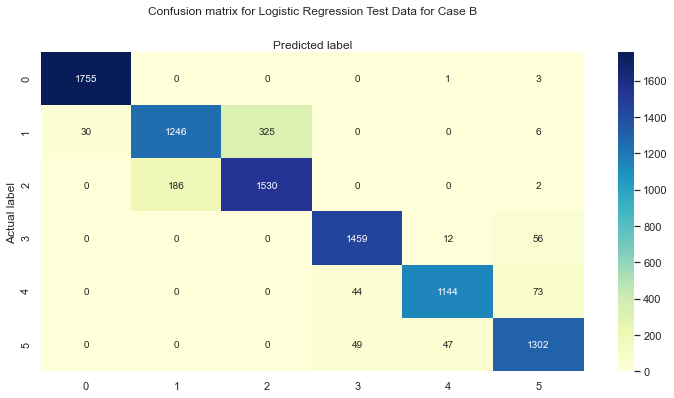

In [34]:
# Visualize Heatmap of Confusion Matrix for test data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_B), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Test Data for Case B', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [35]:
# Look at the Classification report of test data
print(classification_report(y_test_init_txt_B, y_pred_test_B))

                    precision    recall  f1-score   support

            LAYING       0.98      1.00      0.99      1759
           SITTING       0.87      0.78      0.82      1607
          STANDING       0.82      0.89      0.86      1718
           WALKING       0.94      0.96      0.95      1527
WALKING_DOWNSTAIRS       0.95      0.91      0.93      1261
  WALKING_UPSTAIRS       0.90      0.93      0.92      1398

          accuracy                           0.91      9270
         macro avg       0.91      0.91      0.91      9270
      weighted avg       0.91      0.91      0.91      9270



<b><u>Objective</b></u> The Performance metrics of the test data for Case-B:
<ul style="list-style-type:disc"> 
<li> Accuracy = 91% </li>
<li> Precision = 91% </li>
<li> Recall = 91% </li>
<li> F1-Score = 91% </li> </ul>

<a class="anchor" id="section_1_5_4"></a>

<font color='blue'><center><h2> Model Evaluation - Case B - Train Data </h2></center>

In [36]:
clf_train_B = LogisticRegression(multi_class='multinomial', max_iter=500, penalty='l2', C=0.01).fit(X_train_init_B, y_train_init_txt_B.values.ravel())
y_pred_train_logreg_B = clf_train_B.predict(X_train_init_B)

In [37]:
cnf_matrix_logreg_train_B = metrics.confusion_matrix(y_train_init_txt_B, y_pred_train_logreg_B)
print(cnf_matrix_logreg_train_B)

[[185   0   0   0   0   0]
 [  1 140  28   0   0   1]
 [  0  18 169   0   0   1]
 [  0   0   0 191   1   3]
 [  0   0   0   2 138   5]
 [  0   0   0   4   3 139]]


Text(0.5, 320.8, 'Predicted label')

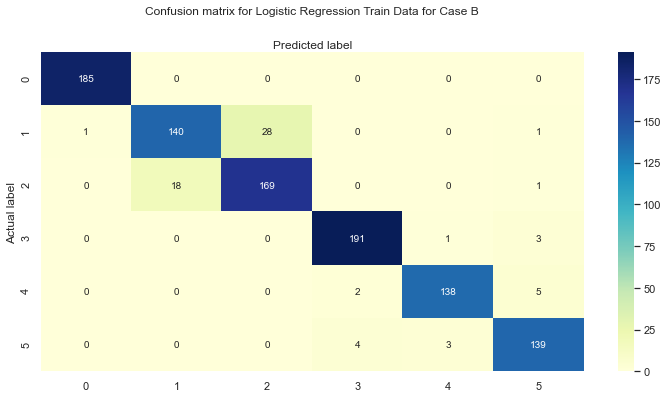

In [38]:
# Visualize Heatmap of Confusion Matrix for train data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_train_B), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Train Data for Case B', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [39]:
# Look at the Classification report of test data
print(classification_report(y_train_init_txt_B, y_pred_train_logreg_B))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       185
           SITTING       0.89      0.82      0.85       170
          STANDING       0.86      0.90      0.88       188
           WALKING       0.97      0.98      0.97       195
WALKING_DOWNSTAIRS       0.97      0.95      0.96       145
  WALKING_UPSTAIRS       0.93      0.95      0.94       146

          accuracy                           0.93      1029
         macro avg       0.94      0.93      0.93      1029
      weighted avg       0.93      0.93      0.93      1029



<b><u>Objective</b></u> The Performance metrics of the train data for Case-B:
<ul style="list-style-type:disc"> 
<li> Accuracy = 93% </li>
<li> Precision = 93% </li>
<li> Recall = 93% </li>
<li> F1-Score = 93% </li> </ul>

<b><u>Inference</b></u> The model performs well with train data and test data. 
As expected, the accuracy and other metrics are better for the train data than the test data.
If we differentiate the metrics across the target classes, Sitting has the lowest performance.

<font color='purple'><center><h1> ============================================================================= </h1></center>

<font color='purple'><center><h1> ============================================================================= </h1></center>

<font color='purple'><center><h1> ============================================================================= </h1></center>

<font color='purple'><center><h1> ============================================================================= </h1></center>

<a class="anchor" id="chapter2"></a>

<font color='purple'><center><h1> Alternate Approach </h1></center>

<a class="anchor" id="section_2_1"></a>

<font color='blue'><center><h2> Normalization </h2></center>

<b><u>Objective</b></u> Before performing the PCA, we need to apply normalization. 
For the main approach (mentioned earlier), we did not normalize the data because the sensor data were all in the same range.
There are no range differences.

In [40]:
# Preparing Datasets

# Apply MinMax Normalization to Case A Datasets
X_train_A = X_train_init_A.copy(deep=True)
y_train_encd_A = y_train_init_encd_A.copy(deep=True)
X_test_A = X_test_init_A.copy(deep=True)
y_test_encd_A = y_test_init_encd_A.copy(deep=True)

to_scale = X_train_A.columns.to_list()

# Apply MinMax Normalization to Case B Datasets
X_train_B = X_train_init_B.copy(deep=True)
y_train_encd_B = y_train_init_encd_B.copy(deep=True)
X_test_B = X_test_init_B.copy(deep=True)
y_test_encd_B = y_test_init_encd_B.copy(deep=True)

# Normalizing continuous variables - Here, all independent variables are continuous

In [41]:
# Scaling for Case A with scaler_A
scaler_A = MinMaxScaler(feature_range = (0,1))

# Scale Train Set
scaler_A.fit(X_train_A[to_scale])
X_train_A.loc[:, to_scale] = scaler_A.transform(X_train_A[to_scale])
scaler_A.fit(y_train_encd_A)
y_train_encd_A = scaler_A.transform(y_train_encd_A)

# Scale Test Set
scaler_A.fit(X_test_A[to_scale])
X_test_A.loc[:, to_scale] = scaler_A.transform(X_test_A[to_scale])
scaler_A.fit(y_test_encd_A)
y_test_encd_A = scaler_A.transform(y_test_encd_A)

In [42]:
# Scaling for Case B with scaler_B
scaler_B = MinMaxScaler(feature_range = (0,1))

# Scale Train Set
scaler_B.fit(X_train_B[to_scale])
X_train_B.loc[:, to_scale] = scaler_B.transform(X_train_B[to_scale])
scaler_B.fit(y_train_encd_B)
y_train_encd_B = scaler_B.transform(y_train_encd_B)

# Scale Test Set
scaler_B.fit(X_test_B[to_scale])
X_test_B.loc[:, to_scale] = scaler_B.transform(X_test_B[to_scale])
scaler_B.fit(y_test_encd_B)
y_test_encd_B = scaler_B.transform(y_test_encd_B)

<a class="anchor" id="section_2_2"></a>

<font color='blue'><center><h2> Principal Component Analysis </h2></center>

In [43]:
# Preparing the Datasets
X_train_pca_A = X_train_A.copy(deep=True)
X_test_pca_A = X_test_A.copy(deep=True)
X_train_pca_B = X_train_B.copy(deep=True)
X_test_pca_B = X_test_B.copy(deep=True)

In [44]:
# Scaling for Case A with pca_module_A
pca_module_A = PCA(n_components=3)

# Scale Train Set
X_train_pcomps_A = pca_module_A.fit_transform(X_train_pca_A)
X_train_final_A = pd.DataFrame(data = X_train_pcomps_A, columns = ['PCA1', 'PCA2', 'PCA3'])

# Scale Test Set
X_test_pcomps_A = pca_module_A.fit_transform(X_test_pca_A)
X_test_final_A = pd.DataFrame(data = X_test_pcomps_A, columns = ['PCA1', 'PCA2', 'PCA3'])

print('Explained variation per principal component A: {}'.format(pca_module_A.explained_variance_ratio_))

Explained variation per principal component A: [0.62289097 0.0498384  0.03434111]


In [45]:
# Scaling for Case B with pca_module_B
pca_module_B = PCA(n_components=3)

# Scale Train Set
X_train_pcomps_B = pca_module_B.fit_transform(X_train_pca_B)
X_train_final_B = pd.DataFrame(data = X_train_pcomps_B, columns = ['PCA1', 'PCA2', 'PCA3'])

# Scale Test Set
X_test_pcomps_B = pca_module_B.fit_transform(X_test_pca_B)
X_test_final_B = pd.DataFrame(data = X_test_pcomps_B, columns = ['PCA1', 'PCA2', 'PCA3'])

print('Explained variation per principal component B: {}'.format(pca_module_B.explained_variance_ratio_))

Explained variation per principal component B: [0.62048374 0.04803344 0.04063686]


<b><u>Objective</b></u> We have extracted 3 principal components from the dataset which contributes to ~71% of the variation in the dataset.

<a class="anchor" id="section_2_3"></a>

<font color='orange'><center><h2> PCA for Plotting </h2></center>

In [46]:
df_logreg_pca = df_logreg.copy(deep=True)
df_logreg_pca = df_logreg_pca.drop(['Activity'], axis=1)
to_scale = df_logreg_pca.columns.to_list()

# Apply MinMax Normalization on the complete dataset
scaler_full = MinMaxScaler(feature_range = (0,1))
scaler_full.fit(df_logreg_pca[to_scale])
df_logreg_pca.loc[:, to_scale] = scaler_full.transform(df_logreg_pca[to_scale])

# Scaling for Case A with pca_module_A
pca_module_full = PCA(n_components=3)
df_logreg_pca = pca_module_full.fit_transform(df_logreg_pca[to_scale])
df_logreg_pcacomps = pd.DataFrame(data = df_logreg_pca, columns = ['PCA1', 'PCA2', 'PCA3'])

print('Explained variation per principal component A: {}'.format(pca_module_full.explained_variance_ratio_))

Explained variation per principal component A: [0.62267095 0.0482064  0.04024078]


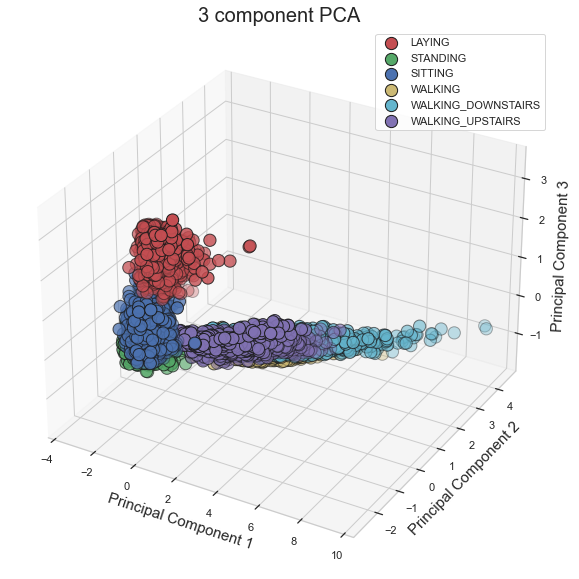

In [47]:
fig_pca = plt.figure(figsize = (10,10))
ax_pca = fig_pca.add_subplot(111, projection='3d')
ax_pca.set_xlabel('Principal Component 1', fontsize = 15)
ax_pca.set_ylabel('Principal Component 2', fontsize = 15)
ax_pca.set_zlabel('Principal Component 3', fontsize = 15)
ax_pca.set_title('3 component PCA', fontsize = 20)
x = df_logreg_pcacomps['PCA1'].to_numpy()
y = df_logreg_pcacomps['PCA2'].to_numpy()
z = df_logreg_pcacomps['PCA3'].to_numpy()
targets = ['LAYING', 'STANDING', 'SITTING','WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']
colors = ['r', 'g', 'b', 'y', 'c', 'm']
for target, color in zip(targets,colors):
    indicesToKeep = df_logreg['Activity'] == target
    ax_pca.scatter(df_logreg_pcacomps.loc[indicesToKeep, 'PCA1'], df_logreg_pcacomps.loc[indicesToKeep, 'PCA2']
               , df_logreg_pcacomps.loc[indicesToKeep, 'PCA3'], edgecolor='k', c = color , s = 150)
ax_pca.legend(targets)
ax_pca.grid()

<b><u>Objective</b></u> Now, we do everything that we did in the main approach.

<a class="anchor" id="section_2_4"></a>

<font color='blue'><center><h2> Model Building with PCA - Case A </h2></center>

In [48]:
# Logistic Regression for Test Set Case A
clf_pca_A = LogisticRegression(multi_class='multinomial', max_iter = 300, penalty='l2', C=0.01).fit(X_train_final_A, y_train_init_txt_A.values.ravel())
y_pred_test_logreg_A = clf_pca_A.predict(X_test_final_A)
accuracy_score_pca_A = accuracy_score(y_test_init_txt_A, y_pred_test_logreg_A)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score_pca_A))

Logistic Regression accuracy: 72.52427184466019%


<a class="anchor" id="section_2_5"></a>

<font color='blue'><center><h2> Model Evaluation with PCA - Case A - Test Data </h2></center>

In [49]:
cnf_matrix_logreg_A = metrics.confusion_matrix(y_test_init_txt_A, y_pred_test_logreg_A)
print(cnf_matrix_logreg_A)

[[355   2   0   0   0   5]
 [ 31 227 108   0   0   0]
 [  0 150 239   0   0   0]
 [  0   0   0 229  92  34]
 [  0   0   0  42 193  49]
 [  0   0   0  12  41 251]]


Text(0.5, 320.8, 'Predicted label')

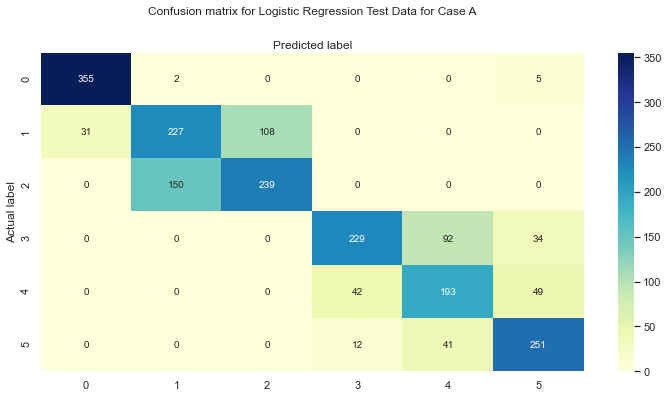

In [50]:
# Visualize Heatmap of Confusion Matrix for test data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_A), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Test Data for Case A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [51]:
# Look at the Classification report of test data
print(classification_report(y_test_init_txt_A, y_pred_test_logreg_A))

                    precision    recall  f1-score   support

            LAYING       0.92      0.98      0.95       362
           SITTING       0.60      0.62      0.61       366
          STANDING       0.69      0.61      0.65       389
           WALKING       0.81      0.65      0.72       355
WALKING_DOWNSTAIRS       0.59      0.68      0.63       284
  WALKING_UPSTAIRS       0.74      0.83      0.78       304

          accuracy                           0.73      2060
         macro avg       0.72      0.73      0.72      2060
      weighted avg       0.73      0.73      0.72      2060



<a class="anchor" id="section_2_6"></a>

<font color='blue'><center><h2> Model Evaluation with PCA - Case A - Train Data </h2></center>

In [52]:
cnf_matrix_train_logreg_A = metrics.confusion_matrix(y_train_init_txt_A, y_pred_train_logreg_A)
print(cnf_matrix_train_logreg_A)

[[1580    0    0    0    2    0]
 [   5 1276  126    0    0    4]
 [   0  108 1407    0    0    2]
 [   0    0    0 1348    8   11]
 [   0    0    0    7 1087   28]
 [   0    0    0    6   15 1219]]


Text(0.5, 320.8, 'Predicted label')

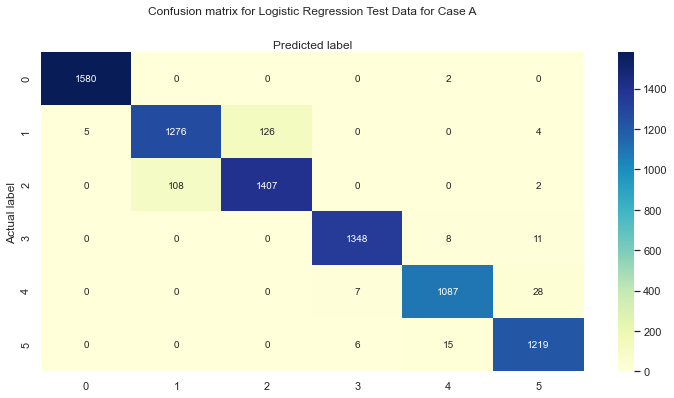

In [53]:
# Visualize Heatmap of Confusion Matrix for test data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_train_logreg_A), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Test Data for Case A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [54]:
# Look at the Classification report of test data
print(classification_report(y_train_init_txt_A, y_pred_train_logreg_A))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1582
           SITTING       0.92      0.90      0.91      1411
          STANDING       0.92      0.93      0.92      1517
           WALKING       0.99      0.99      0.99      1367
WALKING_DOWNSTAIRS       0.98      0.97      0.97      1122
  WALKING_UPSTAIRS       0.96      0.98      0.97      1240

          accuracy                           0.96      8239
         macro avg       0.96      0.96      0.96      8239
      weighted avg       0.96      0.96      0.96      8239



<a class="anchor" id="section_2_7"></a>

<font color='blue'><center><h2> Model Building with PCA - Case B </h2></center>

In [55]:
# Logistic Regression for Test Set Case B
clf_pca_B = LogisticRegression(multi_class='multinomial', max_iter = 300, penalty='l2', C=0.01).fit(X_train_final_B, y_train_init_txt_B.values.ravel())
y_pred_test_logreg_B = clf_pca_B.predict(X_test_final_B)
accuracy_score_pca_B = accuracy_score(y_test_init_txt_B, y_pred_test_logreg_B)*100
print('Logistic Regression accuracy: {}%'.format(accuracy_score_pca_B))

Logistic Regression accuracy: 67.46494066882417%


<a class="anchor" id="section_2_8"></a>

<font color='blue'><center><h2> Model Evaluation with PCA - Case B - Test Data </h2></center>

In [56]:
cnf_matrix_logreg_B = metrics.confusion_matrix(y_test_init_txt_B, y_pred_test_logreg_B)
print(cnf_matrix_logreg_B)

[[1752    0    0    0    0    7]
 [  89  184 1313    0    0   21]
 [   0    0 1709    1    0    8]
 [   0    0    0 1365   59  103]
 [   0    0    0  836  331   94]
 [   0    0    0  450   35  913]]


Text(0.5, 320.8, 'Predicted label')

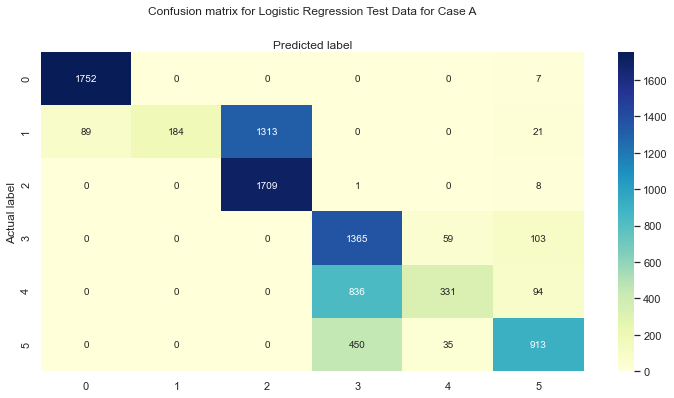

In [57]:
# Visualize Heatmap of Confusion Matrix for test data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_logreg_B), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Test Data for Case A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [58]:
# Look at the Classification report of test data
print(classification_report(y_test_init_txt_B, y_pred_test_logreg_B))

                    precision    recall  f1-score   support

            LAYING       0.95      1.00      0.97      1759
           SITTING       1.00      0.11      0.21      1607
          STANDING       0.57      0.99      0.72      1718
           WALKING       0.51      0.89      0.65      1527
WALKING_DOWNSTAIRS       0.78      0.26      0.39      1261
  WALKING_UPSTAIRS       0.80      0.65      0.72      1398

          accuracy                           0.67      9270
         macro avg       0.77      0.65      0.61      9270
      weighted avg       0.77      0.67      0.62      9270



<a class="anchor" id="section_2_9"></a>

<font color='blue'><center><h2> Model Evaluation with PCA - Case B - Train Data </h2></center>

In [59]:
cnf_matrix_train_logreg_B = metrics.confusion_matrix(y_train_init_txt_B, y_pred_train_logreg_B)
print(cnf_matrix_train_logreg_B)

[[185   0   0   0   0   0]
 [  1 140  28   0   0   1]
 [  0  18 169   0   0   1]
 [  0   0   0 191   1   3]
 [  0   0   0   2 138   5]
 [  0   0   0   4   3 139]]


Text(0.5, 320.8, 'Predicted label')

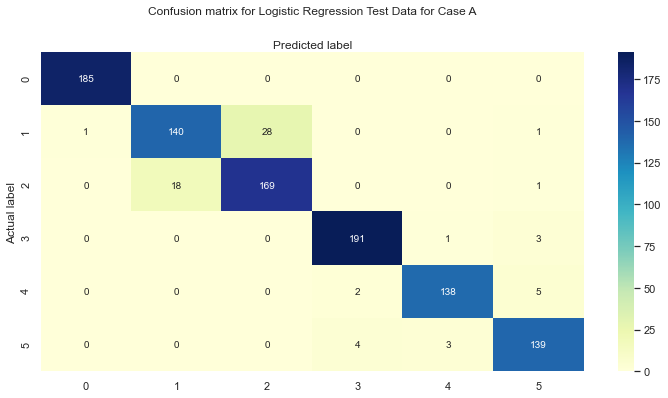

In [60]:
# Visualize Heatmap of Confusion Matrix for test data
# ['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS']

class_names=['LAYING', 'SITTING', 'STANDING', 'WALKING_DOWNSTAIRS', 'WALKING', 'WALKING_UPSTAIRS'] # name  of classes
fig, ax = plt.subplots()
fig.set_size_inches(10,5)

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix_train_logreg_B), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix for Logistic Regression Test Data for Case A', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [61]:
# Look at the Classification report of test data
print(classification_report(y_train_init_txt_B, y_pred_train_logreg_B))

                    precision    recall  f1-score   support

            LAYING       0.99      1.00      1.00       185
           SITTING       0.89      0.82      0.85       170
          STANDING       0.86      0.90      0.88       188
           WALKING       0.97      0.98      0.97       195
WALKING_DOWNSTAIRS       0.97      0.95      0.96       145
  WALKING_UPSTAIRS       0.93      0.95      0.94       146

          accuracy                           0.93      1029
         macro avg       0.94      0.93      0.93      1029
      weighted avg       0.93      0.93      0.93      1029



<b><u>Inference:</b></u> The test data performance metrics suffer due to the loss of information from the PCA operation. 
    And just like the main approach, the metrics are the worst for the Sitting activity. 
    It means that the prediction power is the least for the Sitting activity.